In [ ]:
%pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.5 MB/s eta 0:00:00


In [ ]:
import os
import shutil
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from tqdm import tqdm
from PIL import Image
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Exploratory data analysis

In [ ]:
GOOGLE_DRIVE_ROOT = "/content/drive"

In [ ]:
from google.colab import drive
drive.mount(GOOGLE_DRIVE_ROOT)

Mounted at /content/drive


In [ ]:
PATH_TO_DATASET = os.path.join(GOOGLE_DRIVE_ROOT, "MyDrive", "computer-vision-dataset")
PATH_TO_TRAIN_IMAGES = os.path.join(PATH_TO_DATASET, "images", "training", "image_02")
PATH_TO_LABELS = os.path.join(PATH_TO_DATASET, "labels", "training", "label_02")

In [ ]:
os.listdir(PATH_TO_LABELS)

['0007.txt',
 '0009.txt',
 '0005.txt',
 '0013.txt',
 '0019.txt',
 '0003.txt',
 '0018.txt',
 '0014.txt',
 '0001.txt',
 '0017.txt',
 '0020.txt',
 '0004.txt',
 '0010.txt',
 '0016.txt',
 '0012.txt',
 '0011.txt',
 '0008.txt',
 '0015.txt',
 '0002.txt',
 '0006.txt',
 '0000.txt']

In [ ]:
def load_labels(path_to_labels):
    all_dfs = []

    columns = [
        "frame",
        "track_id",
        "type",
        "truncated",
        "occluded",
        "alpha",
        "bbox_left",
        "bbox_top",
        "bbox_right",
        "bbox_bottom",
        "dim_height",
        "dim_width",
        "dim_length",
        "loc_x",
        "loc_y",
        "loc_z",
        "rotation_y"
    ]

    for filename in os.listdir(path_to_labels):
        sequence_df = pd.read_csv(os.path.join(path_to_labels, filename), names=columns, sep=" ", header=None)
        sequence_df["sequence"] = filename.split(".")[0]
        all_dfs.append(sequence_df)

    return pd.concat(all_dfs, ignore_index=True)

In [ ]:
df = load_labels(PATH_TO_LABELS)

In [ ]:
df.head(15)

,frame,track_id,type,truncated,occluded,alpha,bbox_left,bbox_top,bbox_right,bbox_bottom,dim_height,dim_width,dim_length,loc_x,loc_y,loc_z,rotation_y,sequence
0,0,-1,DontCare,-1,-1,-10.000000,1124.600000,135.120000,1199.300000,250.590000,-1000.0000,-1000.000,-1000.000,-10.000000,-1.000000,-1.000000,-1.000000,0007
1,0,-1,DontCare,-1,-1,-10.000000,883.000000,161.320000,908.230000,218.560000,-1000.0000,-1000.000,-1000.000,-10.000000,-1.000000,-1.000000,-1.000000,0007
2,0,-1,DontCare,-1,-1,-10.000000,842.250000,171.990000,865.530000,208.860000,-1000.0000,-1000.000,-1000.000,-10.000000,-1.000000,-1.000000,-1.000000,0007
3,0,0,Car,0,0,1.749427,419.230109,189.412920,555.229894,288.627081,1.4375,1.675,3.875,-2.053368,1.766400,12.854995,1.593123,0007
4,1,-1,DontCare,-1,-1,-10.000000,880.960000,161.240000,905.090000,219.310000,-1000.0000,-1000.000,-1000.000,-10.000000,-1.000000,-1.000000,-1.000000,0007
5,1,-1,DontCare,-1,-1,-10.000000,840.400000,171.930000,865.030000,208.030000,-1000.0000,-1000.000,-1000.000,-10.000000,-1.000000,-1.000000,-1.000000,0007
6,1,-1,DontCare,-1,-1,-10.000000,1098.400000,139.970000,1179.900000,240.880000,-1000.0000,-1000.000,-1000.000,-10.000000,-1.000000,-1.000000,-1.000000,0007
7,1,0,Car,0,0,1.760344,400.181756,189.919931,550.205950,298.665701,1.4375,1.675,3.875,-2.074321,1.754563,11.916025,1.590583,0007
8,2,-1,DontCare,-1,-1,-10.000000,880.790000,160.890000,904.870000,218.770000,-1000.0000,-1000.000,-1000.000,-10.000000,-1.000000,-1.000000,-1.000000,0007
9,2,-1,DontCare,-1,-1,-10.000000,840.210000,171.660000,864.850000,207.610000,-1000.0000,-1000.000,-1000.000,-10.000000,-1.000000,-1.000000,-1.000000,0007


In [ ]:
len(df)

65301

In [ ]:
df.isna().sum()

,0
frame,0
track_id,0
type,0
truncated,0
occluded,0
alpha,0
bbox_left,0
bbox_top,0
bbox_right,0
bbox_bottom,0


In [ ]:
def plot_image_frequencies(path_to_images):
    counts = {}

    for folder in sorted(os.listdir(path_to_images)):
        folder_path = os.path.join(path_to_images, folder)
        n_frames = len([f for f in os.listdir(folder_path) if f.endswith(".png")])
        counts[folder] = n_frames

    plt.figure(figsize=(12, 6))
    plt.bar(counts.keys(), counts.values())
    plt.title("Frames per sequence")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_example_pedestrian(df, sequence, path_to_images):
    subset = df[(df["sequence"] == sequence) & (df["type"] == "Pedestrian")]

    if subset.empty:
        print(f"No pedestrians found in sequence {sequence}")
        return

    target_frame = subset.iloc[0]["frame"]
    peds_in_frame = subset[subset["frame"] == target_frame]

    image_filename = f"{int(target_frame):06d}.png"
    full_image_path = os.path.join(path_to_images, sequence, image_filename)

    if not os.path.exists(full_image_path):
        print(f"Image file not found at: {full_image_path}")
        return

    image = plt.imread(full_image_path)
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.imshow(image)

    for _, row in peds_in_frame.iterrows():
        x = row['bbox_left']
        y = row['bbox_top']
        w = row['bbox_right'] - row['bbox_left']
        h = row['bbox_bottom'] - row['bbox_top']

        rect = patches.Rectangle(
            (x, y), w, h,
            linewidth=2, edgecolor='r', facecolor='none'
        )
        ax.add_patch(rect)

        plt.text(
            x, y - 5,
            f"ID: {int(row['track_id'])}",
            color='white', fontsize=10, weight='bold',
            bbox=dict(facecolor='red', alpha=0.5, pad=0)
        )

    plt.title(f"Sequence: {sequence} | Frame: {target_frame}", fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
images_folders = os.listdir(PATH_TO_TRAIN_IMAGES)
images_folders

['0001',
 '0000',
 '0004',
 '0002',
 '0005',
 '0003',
 '0006',
 '0007',
 '0009',
 '0008',
 '0015',
 '0012',
 '0014',
 '0011',
 '0013',
 '0010',
 '0017',
 '0016',
 '0018',
 '0019',
 '0020']

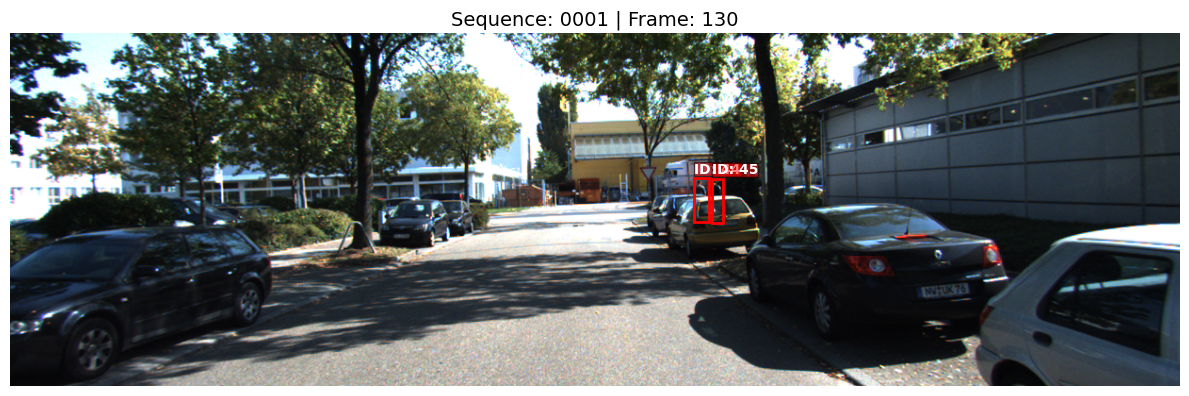

In [ ]:
plot_example_pedestrian(df, sequence=images_folders[0], path_to_images=PATH_TO_TRAIN_IMAGES)

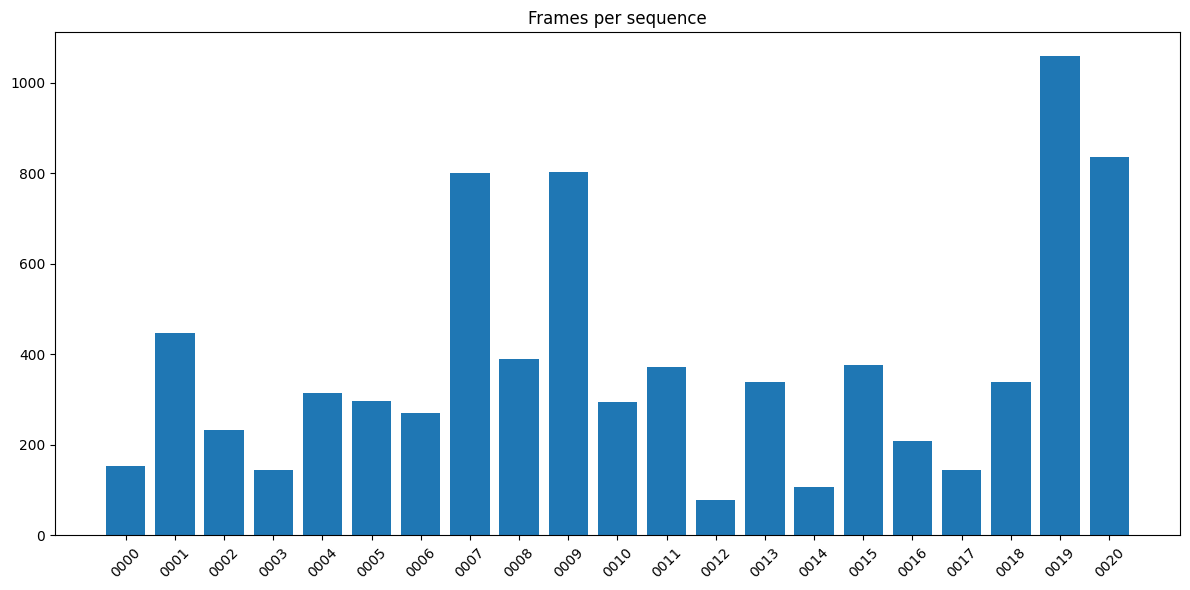

In [ ]:
plot_image_frequencies(PATH_TO_TRAIN_IMAGES)

In [ ]:
def plot_frame_with_type_frequencies(df, object_type):
    ped_df = df[df["type"] == object_type]

    all_sequences = sorted(df["sequence"].unique())
    counts = ped_df.groupby("sequence")["frame"].nunique().reindex(all_sequences, fill_value=0)

    plt.figure(figsize=(12, 6))
    plt.bar(counts.index, counts.values)
    plt.title(f"Frames with type {object_type} per sequence")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return counts.reset_index()

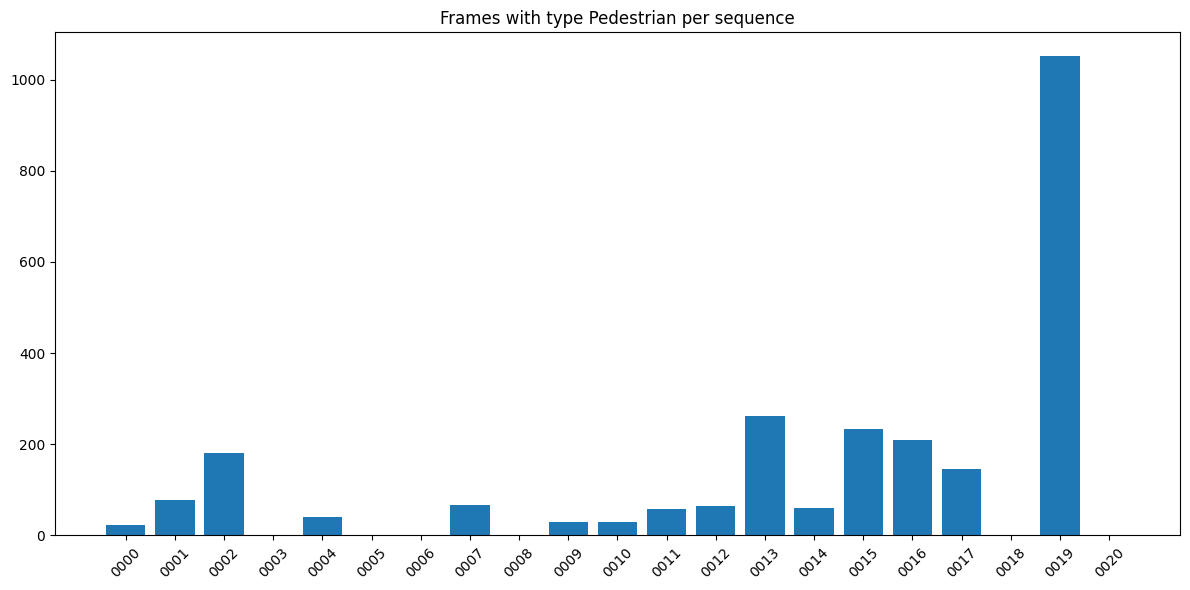

In [ ]:
frames_with_pedestrian_freq = plot_frame_with_type_frequencies(df, "Pedestrian")

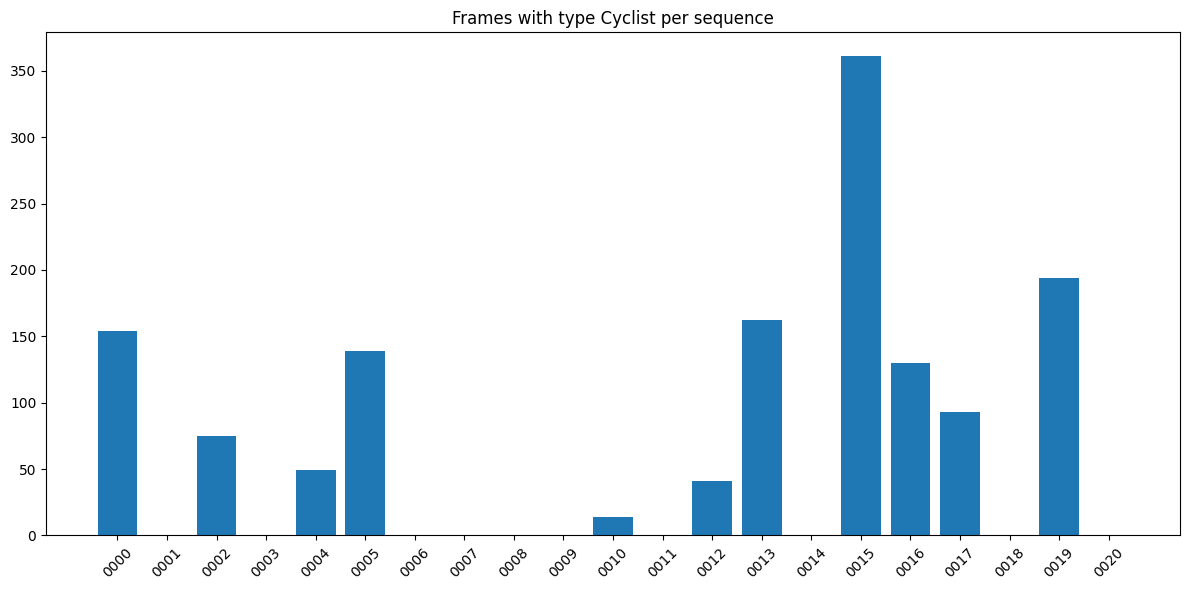

,sequence,frame
0,0000,154
1,0001,0
2,0002,75
3,0003,0
4,0004,49
5,0005,139
6,0006,0
7,0007,0
8,0008,0
9,0009,0


In [ ]:
plot_frame_with_type_frequencies(df, "Cyclist")

In [ ]:
frames_with_pedestrian_freq

,sequence,frame
0,0000,22
1,0001,78
2,0002,180
3,0003,0
4,0004,41
5,0005,0
6,0006,0
7,0007,67
8,0008,0
9,0009,29


In [ ]:
total_frames_with_pedestrian_count = frames_with_pedestrian_freq["frame"].sum()
total_frames_count = (df.groupby("sequence")["frame"].max() + 1).sum()

print(f"Frames count with pedestrians: {total_frames_with_pedestrian_count}")
print(f"Percentage: {(total_frames_with_pedestrian_count / total_frames_count) * 100:.2f}%")

Frames count with pedestrians: 2529
Percentage: 31.58%


In [ ]:
def split_train_val_sequences(frames_with_label_count, top_seq_for_train):
    sorted_df = frames_with_label_count.sort_values(by="frame", ascending=False)

    train_df = sorted_df.iloc[:top_seq_for_train]
    val_df = sorted_df.iloc[top_seq_for_train:]

    train_sequences = train_df["sequence"].tolist()
    val_sequences = val_df["sequence"].tolist()

    train_images_count = train_df["frame"].sum()
    val_images_count = val_df["frame"].sum()

    return (train_sequences, val_sequences, train_images_count, val_images_count)

In [ ]:
train_sequences, val_sequences, train_images_count, val_images_count = split_train_val_sequences(frames_with_pedestrian_freq, top_seq_for_train=6)
total_images_count = train_images_count + val_images_count

print(f"Total images count: {total_images_count}. Train dataset part: {(train_images_count/total_images_count) * 100:.3f}%")

Total images count: 2529. Train dataset part: 82.246%


# Training object detector(YOLO)

In [ ]:
PATH_TO_YOLO_DATASET = os.path.join(PATH_TO_DATASET, "yolo")

In [ ]:
def get_yolo_images_root_folder(path_to_yolo_dataset):
    return os.path.join(path_to_yolo_dataset, "images")

In [ ]:
def get_yolo_labels_root_folder(path_to_yolo_dataset):
    return os.path.join(path_to_yolo_dataset, "labels")

In [ ]:
def create_dirs_for_yolo_dataset(yolo_dataset_root):
    images_folder = get_yolo_images_root_folder(yolo_dataset_root)
    labels_folder = get_yolo_labels_root_folder(yolo_dataset_root)

    os.makedirs(yolo_dataset_root, exist_ok=True)

    os.makedirs(images_folder, exist_ok=True)
    os.makedirs(os.path.join(images_folder, "train"), exist_ok=True)
    os.makedirs(os.path.join(images_folder, "val"), exist_ok=True)

    os.makedirs(labels_folder, exist_ok=True)
    os.makedirs(os.path.join(labels_folder, "train"), exist_ok=True)
    os.makedirs(os.path.join(labels_folder, "val"), exist_ok=True)

In [ ]:
# create_dirs_for_yolo_dataset(PATH_TO_YOLO_DATASET)

In [ ]:
def create_yolo_dataset_settings(yolo_dataset_root):
    yaml_content = f"""path: {os.path.abspath(yolo_dataset_root)}
train: images/train
val: images/val
nc: 2
names:
  0: Pedestrian
  1: Cyclist
"""

    file_path = os.path.join(yolo_dataset_root, "data.yaml")

    with open(file_path, "w") as f:
        f.write(yaml_content)

In [ ]:
# create_yolo_dataset_settings(PATH_TO_YOLO_DATASET)

In [ ]:
CLASS_MAPPING = {
    "Pedestrian": 0,
    "Cyclist": 1
}

In [ ]:
def init_yolo_dataset(path_to_yolo_dataset, path_to_kitti_dataset, df, train_sequences, val_sequences, class_mapping):
    target_classes = list(class_mapping.keys())
    target_detections_df = df[df["type"].isin(target_classes)]

    tasks = [
        (train_sequences, "train"),
        (val_sequences, "val")
    ]

    for sequences_list, split_name in tasks:
        for seq_id in sequences_list:
            seq_images_dir = os.path.join(path_to_kitti_dataset, seq_id)

            if not os.path.exists(seq_images_dir):
                continue

            image_files = sorted([f for f in os.listdir(seq_images_dir) if f.endswith((".png", ".jpg"))])

            seq_df = target_detections_df[target_detections_df["sequence"] == seq_id]
            frame_groups = seq_df.groupby("frame")

            for img_file in tqdm(image_files, desc=f"Processing sequence: {seq_id}"):
                frame_idx = int(os.path.splitext(img_file)[0])

                should_copy = False
                has_detections = frame_idx in frame_groups.groups

                if split_name == "train":
                    should_copy = True
                else:
                    if has_detections or random.random() < 0.01:
                        should_copy = True

                if not should_copy:
                    continue

                yolo_image_name = f"{seq_id}_{img_file}"
                src_img_path = os.path.join(seq_images_dir, img_file)
                dst_img_path = os.path.join(path_to_yolo_dataset, "images", split_name, yolo_image_name)
                shutil.copy2(src_img_path, dst_img_path)

                label_lines = []

                if has_detections:
                    with Image.open(src_img_path) as img:
                        w, h = img.size

                    if frame_idx in frame_groups.groups:
                        objects = frame_groups.get_group(frame_idx)

                        for _, row in objects.iterrows():
                            obj_type = row["type"]
                            class_id = class_mapping[obj_type]

                            x1, y1 = row["bbox_left"], row["bbox_top"]
                            x2, y2 = row["bbox_right"], row["bbox_bottom"]

                            x_center = ((x1 + x2) / 2.0) / w
                            y_center = ((y1 + y2) / 2.0) / h
                            relative_width = (x2 - x1) / w
                            relative_height = (y2 - y1) / h

                            label_lines.append(f"{class_id} {x_center:.6f} {y_center:.6f} {relative_width:.6f} {relative_height:.6f}")

                yolo_txt_filename = yolo_image_name.replace(".png", ".txt").replace(".jpg", ".txt")
                dst_label_path = os.path.join(path_to_yolo_dataset, "labels", split_name, yolo_txt_filename)

                with open(dst_label_path, "w") as f:
                    if label_lines:
                        f.write("\n".join(label_lines))

In [ ]:
# init_yolo_dataset(
#     path_to_yolo_dataset=PATH_TO_YOLO_DATASET,
#     path_to_kitti_dataset=PATH_TO_TRAIN_IMAGES,
#     df=df,
#     train_sequences=train_sequences,
#     val_sequences=val_sequences,
#     class_mapping=CLASS_MAPPING
# )

In [ ]:
TRAINING_OUTPUT_ROOT_PATH = os.path.join(GOOGLE_DRIVE_ROOT, "MyDrive", "computer-vision-lab-output")
METRICS_OUTPUT_PATH = os.path.join(TRAINING_OUTPUT_ROOT_PATH, "metrics")

In [ ]:
N_EPOCHS=75
BATCH_SIZE=16
IMAGE_TRAIN_SIZE=960

In [ ]:
# model = YOLO('yolov8s.pt')
# results = model.train(
#         data=os.path.join(PATH_TO_YOLO_DATASET, "data.yaml"),
#         epochs=N_EPOCHS,
#         patience=50,
#         batch=BATCH_SIZE,
#         imgsz=IMAGE_TRAIN_SIZE,
#         project=METRICS_OUTPUT_PATH,
#         exist_ok=True,
#         pretrained=True,
#         verbose=True,
#         cache=True,
#         optimizer='AdamW',
#         lr0=0.001,
#         warmup_epochs=3.0,
#         cos_lr=True,
# )

In [ ]:
MODEL_OUTPUT_PATH = os.path.join(TRAINING_OUTPUT_ROOT_PATH, "metrics", "train", "weights", "best.pt")

In [ ]:
PATH_TO_TRACKING_TEST_SEQUENCE = os.path.join(PATH_TO_TRAIN_IMAGES, "0013")

In [ ]:
model = YOLO(MODEL_OUTPUT_PATH)

results = model.track(
    source=PATH_TO_TRACKING_TEST_SEQUENCE,
    tracker="bytetrack.yaml",
    persist=True,
    conf=0.1,
    iou=0.5,
    imgsz=960,
    classes=[CLASS_MAPPING["Pedestrian"]],
    save=True,
    project=os.path.join(TRAINING_OUTPUT_ROOT_PATH, "tracking"),
    name="tracking_result_0018"
)


image 1/340 /content/drive/MyDrive/computer-vision-dataset/images/training/image_02/0013/000000.png: 320x960 1 Pedestrian, 13.8ms
image 2/340 /content/drive/MyDrive/computer-vision-dataset/images/training/image_02/0013/000001.png: 320x960 (no detections), 13.1ms
image 3/340 /content/drive/MyDrive/computer-vision-dataset/images/training/image_02/0013/000002.png: 320x960 (no detections), 13.2ms
image 4/340 /content/drive/MyDrive/computer-vision-dataset/images/training/image_02/0013/000003.png: 320x960 1 Pedestrian, 54.8ms
image 5/340 /content/drive/MyDrive/computer-vision-dataset/images/training/image_02/0013/000004.png: 320x960 2 Pedestrians, 13.2ms
image 6/340 /content/drive/MyDrive/computer-vision-dataset/images/training/image_02/0013/000005.png: 320x960 1 Pedestrian, 13.2ms
image 7/340 /content/drive/MyDrive/computer-vision-dataset/images/training/image_02/0013/000006.png: 320x960 2 Pedestrians, 13.2ms
image 8/340 /content/drive/MyDrive/computer-vision-dataset/images/training/image_